In [1]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.3 MB/s eta 0:00:00


In [2]:
import ee
import geemap
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import contextily as ctx

In [3]:
# ee.Authenticate()
# ee.Initialize(project='ee-mwu336')

# Prepare

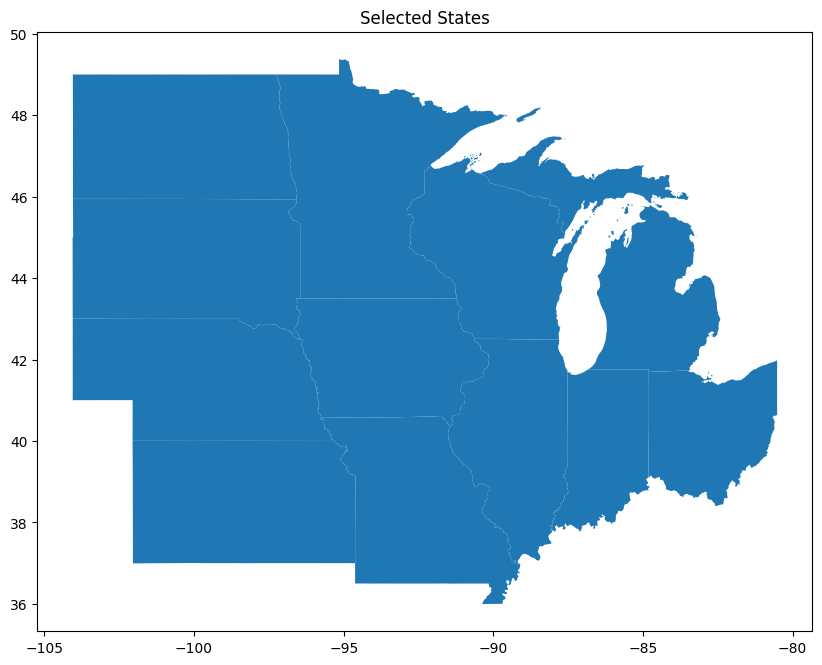

In [4]:
# Load the GeoJSON file into a GeoDataFrame
gdf_state_bon = gpd.read_file('/content/drive/MyDrive/Lab/BNN/Data/geoBoundaries-USA-ADM1.geojson')

# Optional: print the first few rows
states = [
    'Illinois',     # 17
    'Indiana',      # 18
    'Iowa',         # 19
    'Kansas',       # 20
    'Michigan',     # 26
    'Minnesota',    # 27
    'Missouri',     # 29
    'Nebraska',     # 31
    'North Dakota', # 38
    'Ohio',         # 39
    'South Dakota', # 46
    'Wisconsin'     # 55
]

selected_gdf = gdf_state_bon[gdf_state_bon['shapeName'].isin(states)]
selected_gdf.head()
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed

# Plot the selected GeoDataFrame
selected_gdf.plot(ax=ax)

# Set title and display the plot
ax.set_title('Selected States')
plt.show()

county boundary

In [5]:
# # List of state FIPS codes (as strings)
# state_fips_codes = ['17', '18', '19', '20', '26', '27', '29', '31', '38', '39', '46', '55']

# # Load counties from TIGER/2018
# counties = ee.FeatureCollection("TIGER/2018/Counties")

# # Filter counties where STATEFP is in your list
# filtered_counties = counties.filter(ee.Filter.inList('STATEFP', state_fips_codes))

# # Option 1: Export using geemap to GeoJSON (to your local disk)
# geemap.ee_export_vector(filtered_counties, filename='/content/drive/MyDrive/Lab/BNN/Data/selected_counties.geojson')

In [6]:
# Load the GeoJSON file into a GeoDataFrame
gdf_county = gpd.read_file('/content/drive/MyDrive/Lab/BNN/Data/selected_counties.geojson')

# Optional: print the first few rows
gdf_county.head()

# Make sure both GeoDataFrames have the same Coordinate Reference System (CRS)
gdf_county = gdf_county.to_crs(selected_gdf.crs)

# Perform the clip operation
clipped_gdf_county = gpd.clip(gdf_county, selected_gdf)

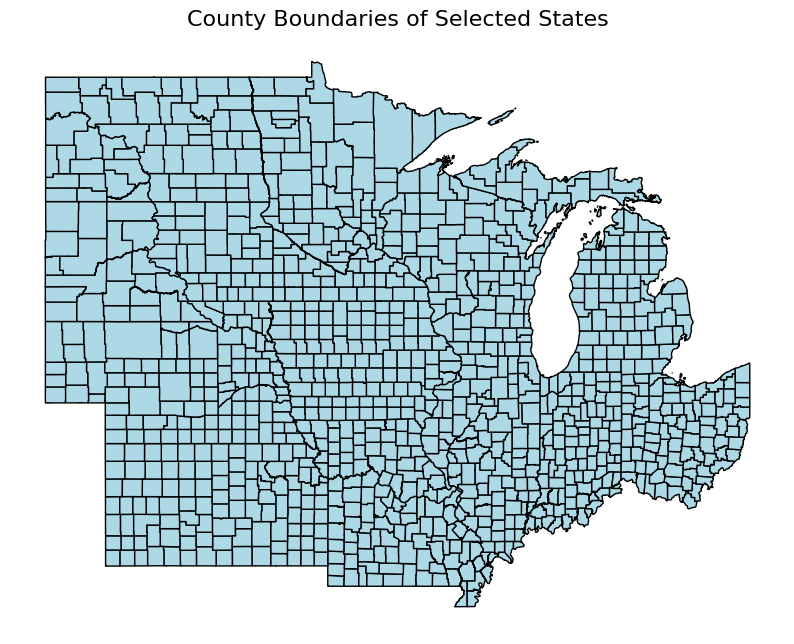

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
clipped_gdf_county.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Add title and remove axes
ax.set_title('County Boundaries of Selected States', fontsize=16)
ax.axis('off')

# Show the plot
plt.show()

state boundory

In [8]:
# state_fips_codes = ['17', '18', '19', '20', '26', '27', '29', '31', '38', '39', '46', '55']
# # Load states from the US Census TIGER dataset
# states = ee.FeatureCollection("TIGER/2018/States")

# # Filter states based on FIPS codes
# filtered_states = states.filter(ee.Filter.inList('STATEFP', state_fips_codes))
# # Export filtered states to a GeoJSON file in your Google Drive
# geemap.ee_export_vector(filtered_states, filename='/content/drive/MyDrive/Lab/BNN/Data/selected_states.geojson')

In [9]:
# Load the GeoJSON file into a GeoDataFrame
gdf_state = gpd.read_file('/content/drive/MyDrive/Lab/BNN/Data/selected_states.geojson')

# Optional: print the first few rows
gdf_state.head()

# Make sure both GeoDataFrames have the same Coordinate Reference System (CRS)
gdf_state = gdf_state.to_crs(selected_gdf.crs)

# Perform the clip operation
clipped_gdf_state = gpd.clip(gdf_state, selected_gdf)
clipped_gdf_state

id   STATENS GEOID        AWATER LSAD STUSPS STATEFP  \
8   0000000000000000002d  01779791    29    2489425460   00     MO      29   
0   00000000000000000002  01779784    17    6214824948   00     IL      17   
4   00000000000000000030  00448508    18    1538002829   00     IN      18   
2   00000000000000000018  01085497    39   10268850702   00     OH      39   
1   0000000000000000000f  01779806    55   29344951758   00     WI      55   
3   0000000000000000002a  01779789    26  103885855702   00     MI      26   
9   0000000000000000002f  00481813    20    1344141205   00     KS      20   
6   00000000000000000011  01779792    31    1371829134   00     NE      31   
11  00000000000000000036  01779785    19    1084180812   00     IA      19   
10  00000000000000000032  01785534    46    3382720225   00     SD      46   
5   00000000000000000003  00662849    27   18945217189   00     MN      27   
7   00000000000000000020  01779797    38    4403267548   00     ND      38   

   FUNCSTAT     INTPTLAT DIVISION REGION          NAME      INTPTLON  MTFCC  \
8         A  +38.3507500        4      2      Missouri  -092.4567826  G4000   
0         A  +40.1028754        3      2      Illinois  -089.1526108  G4000   
4         A  +39.9013136        3      2       Indiana  -086.2919129  G4000   
2         A  +40.4149297        3      2          Ohio  -082.7119975  G4000   
1         A  +44.6309071        3      2     Wisconsin  -089.7093916  G4000   
3         A  +44.8441768        3      2      Michigan  -085.6604907  G4000   
9         A  +38.4985464        4      2        Kansas  -098.3834298  G4000   
6         A  +41.5433053        4      2      Nebraska  -099.8118646  G4000   
11        A  +42.0700243        4      2          Iowa  -093.4933473  G4000   
10        A  +44.4467957        4      2  South Dakota  -100.2381762  G4000   
5         A  +46.3159573        4      2     Minnesota  -094.1996043  G4000   
7         A  +47.4421740        4      2  North Dakota  -100.4608258  G4000   

           ALAND                                           geometry  
8   178050802184  GEOMETRYCOLLECTION (LINESTRING (-89.25648 37.0...  
0   143780567633  POLYGON ((-89.16213 37.00057, -89.1616 37.0000...  
4    92789302676  POLYGON ((-88.02834 37.80003, -88.02838 37.800...  
2   105828882568  MULTIPOLYGON (((-84.8195 39.10564, -84.81999 3...  
1   140290039723  GEOMETRYCOLLECTION (LINESTRING (-92.29229 46.6...  
3   146600952990  MULTIPOLYGON (((-87.59189 45.09469, -87.59221 ...  
9   211755344060  GEOMETRYCOLLECTION (LINESTRING (-94.87632 39.7...  
6   198956658395  POLYGON ((-104.05302 41.09029, -104.05302 41.0...  
11  144661267977  GEOMETRYCOLLECTION (LINESTRING (-96.23435 42.0...  
10  196346981786  GEOMETRYCOLLECTION (LINESTRING (-96.44557 42.4...  
5   206228939448  MULTIPOLYGON (((-92.01528 46.70645, -92.01581 ...  
7   178707534813  POLYGON ((-104.0488 48.8674, -104.0488 48.8674...

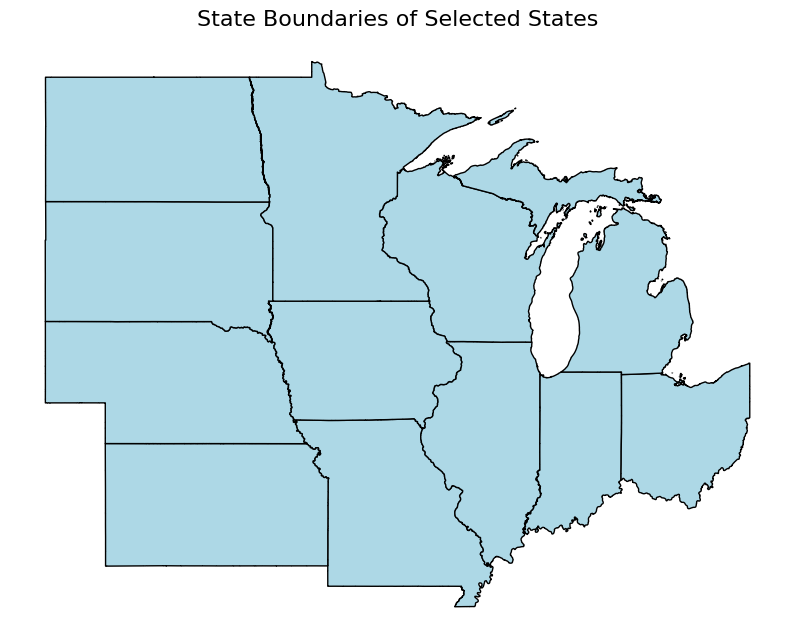

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
clipped_gdf_state.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Add title and remove axes
ax.set_title('State Boundaries of Selected States', fontsize=16)
ax.axis('off')

# Show the plot
plt.show()

<ipython-input-11-fc6381031533>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


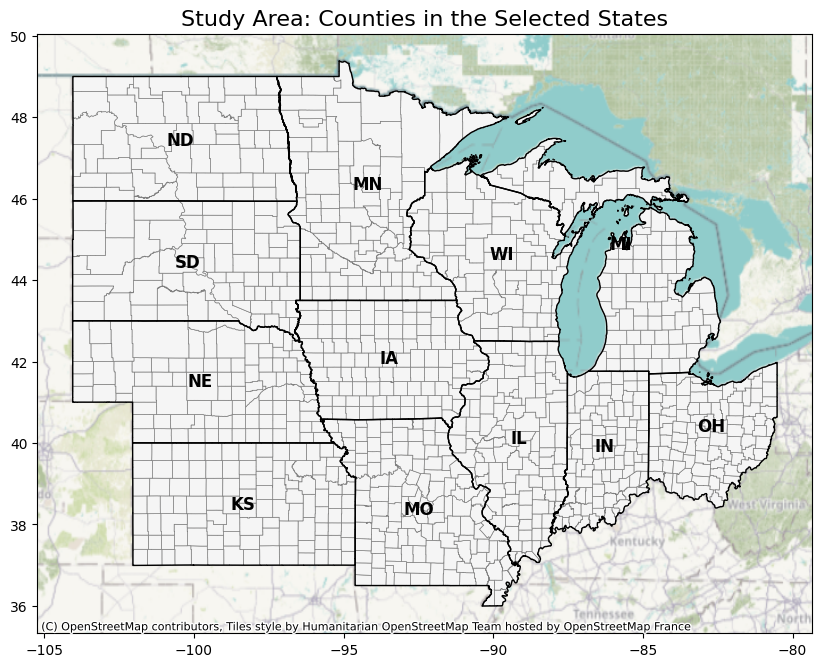

In [11]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# 1. Plot county boundaries first (bottom layer)
clipped_gdf_county.plot(
    ax=ax,
    facecolor='whitesmoke',  # or 'none' if you want it transparent
    edgecolor='grey',
    linewidth=0.5  # Adjust line width as needed
)

# 2. Plot state boundaries on top (top layer)
clipped_gdf_state.plot(ax=ax, edgecolor='black', facecolor='none')

# Add basemap using contextily
ctx.add_basemap(ax, crs=gdf_state.crs.to_string())

# Add title and show the plot
ax.set_title('Study Area: Counties in the Selected States', fontsize=16)

# Add state labels
for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):
    ax.text(x, y, label, fontsize=12, fontweight='bold', ha='center', va='center')

plt.show()

In [12]:
phe = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/corn_input_final.csv')
geoid = phe[['year', 'GEOID', 'Value']]
geoid

year  GEOID  Value
0      2008  17001  171.0
1      2008  17003  144.0
2      2008  17005  164.0
3      2008  17007  169.0
4      2008  17009  152.0
...     ...    ...    ...
10040  2023  55133  172.4
10041  2023  55135  162.4
10042  2023  55137  179.7
10043  2023  55139  176.1
10044  2023  55141  157.0

[10045 rows x 3 columns]

<ipython-input-13-ccfc893f190a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoid['GEOID'] = geoid['GEOID'].astype(str)
<ipython-input-13-ccfc893f190a>:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


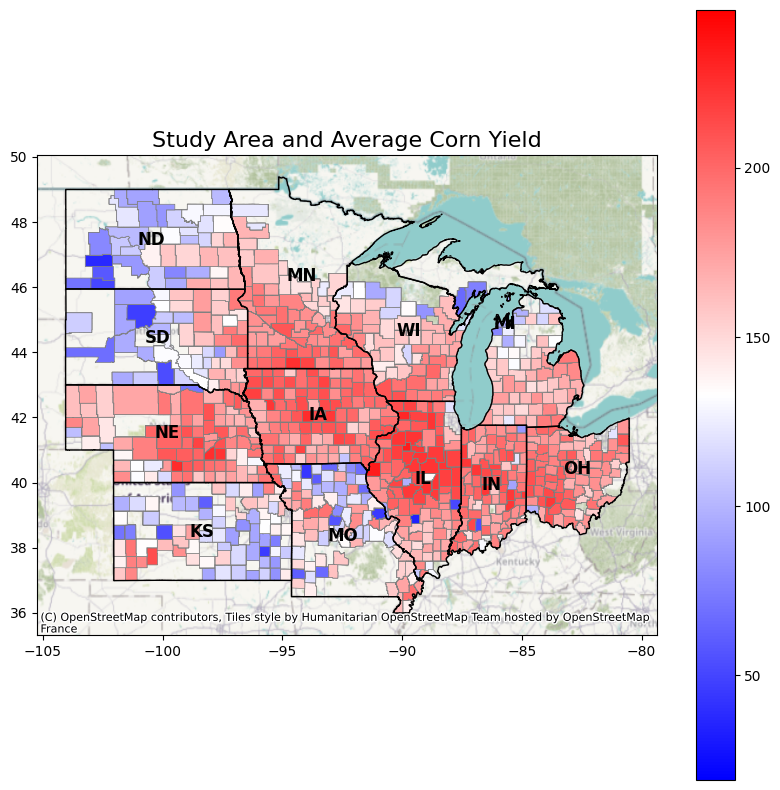

In [13]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Ensure 'GEOID' columns are of the same data type (e.g., string)
clipped_gdf_county['GEOID'] = clipped_gdf_county['GEOID'].astype(str)
geoid['GEOID'] = geoid['GEOID'].astype(str)

# Merge clipped_gdf_county with geoid on 'GEOID' if not already merged
if 'Value' not in clipped_gdf_county.columns:
    clipped_gdf_county = clipped_gdf_county.merge(geoid[['GEOID', 'Value']], on='GEOID', how='left')


# 1. Plot county boundaries with color map
clipped_gdf_county.plot(
    ax=ax,
    column='Value',  # Use 'Value' column for color mapping
    cmap='bwr',  # Choose a colormap (e.g., 'viridis', 'plasma', 'RdYlBu')
    edgecolor='grey',
    linewidth=0.5,
    legend=True  # Add a legend to show color scale
)

# 2. Plot state boundaries on top (top layer)
clipped_gdf_state.plot(ax=ax, edgecolor='black', facecolor='none')

# Add basemap using contextily
ctx.add_basemap(ax, crs=gdf_state.crs.to_string())

# Add title and show the plot
ax.set_title('Study Area and Average Corn Yield', fontsize=16)

# Add state labels
for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):
    ax.text(x, y, label, fontsize=12, fontweight='bold', ha='center', va='center')

plt.show()

# Phenology

<ipython-input-22-6bf96394fa2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoid['GEOID'] = geoid['GEOID'].astype('int64')
<ipython-input-22-6bf96394fa2b>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


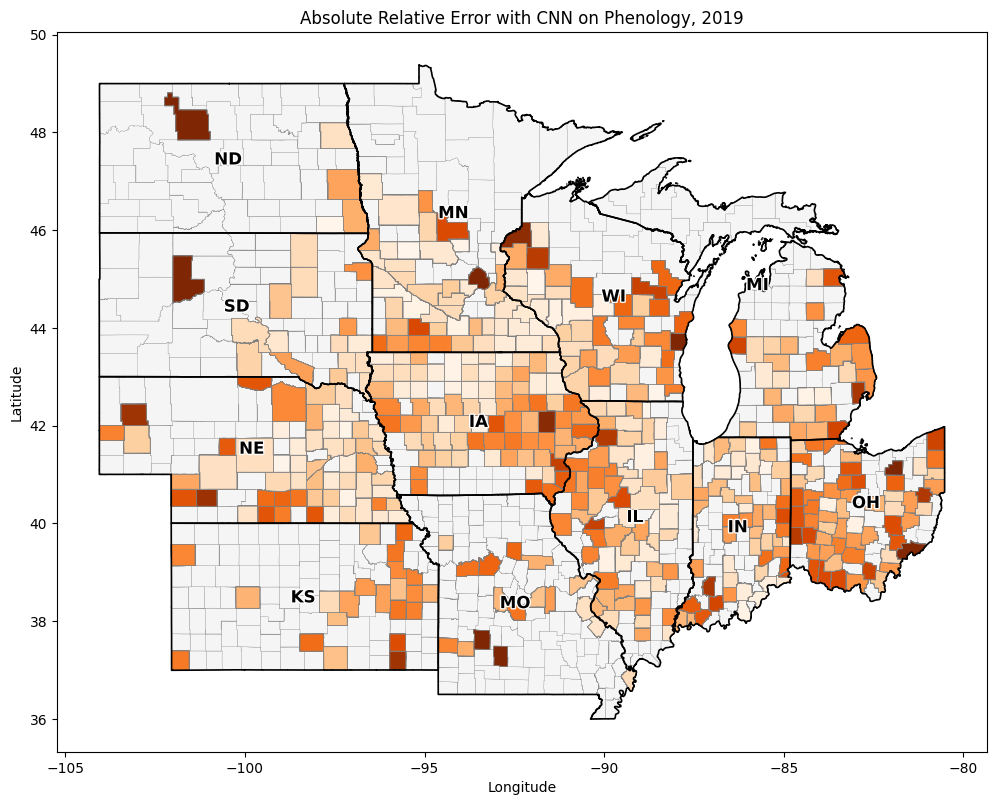

<ipython-input-22-6bf96394fa2b>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


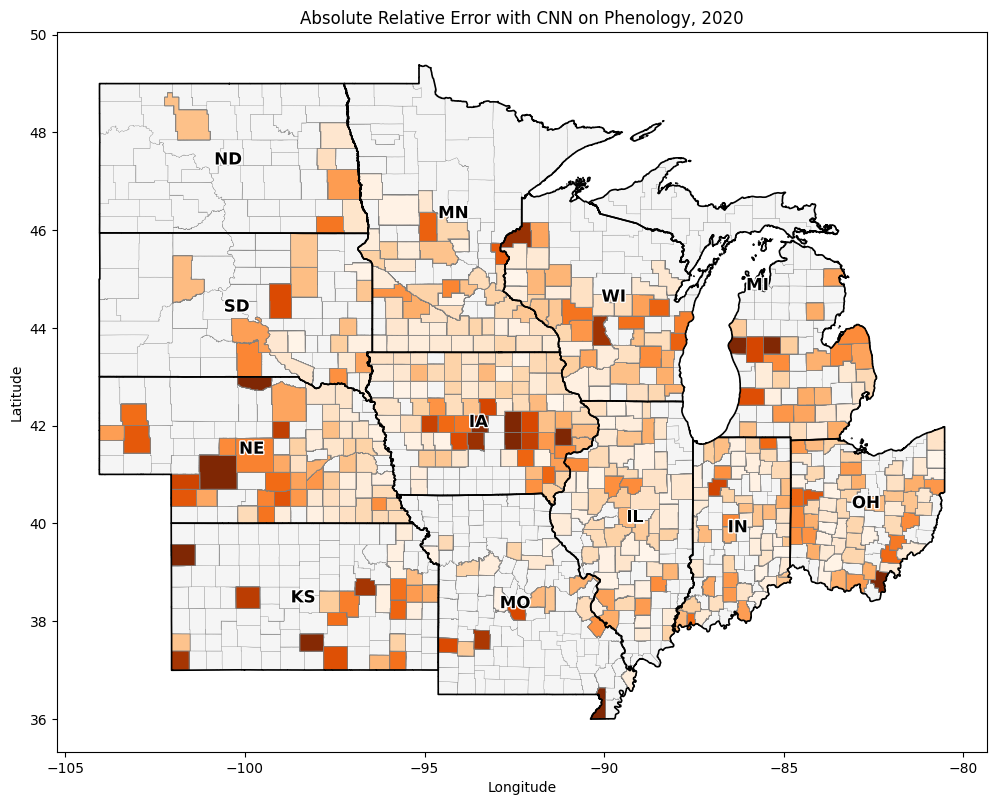

<ipython-input-22-6bf96394fa2b>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


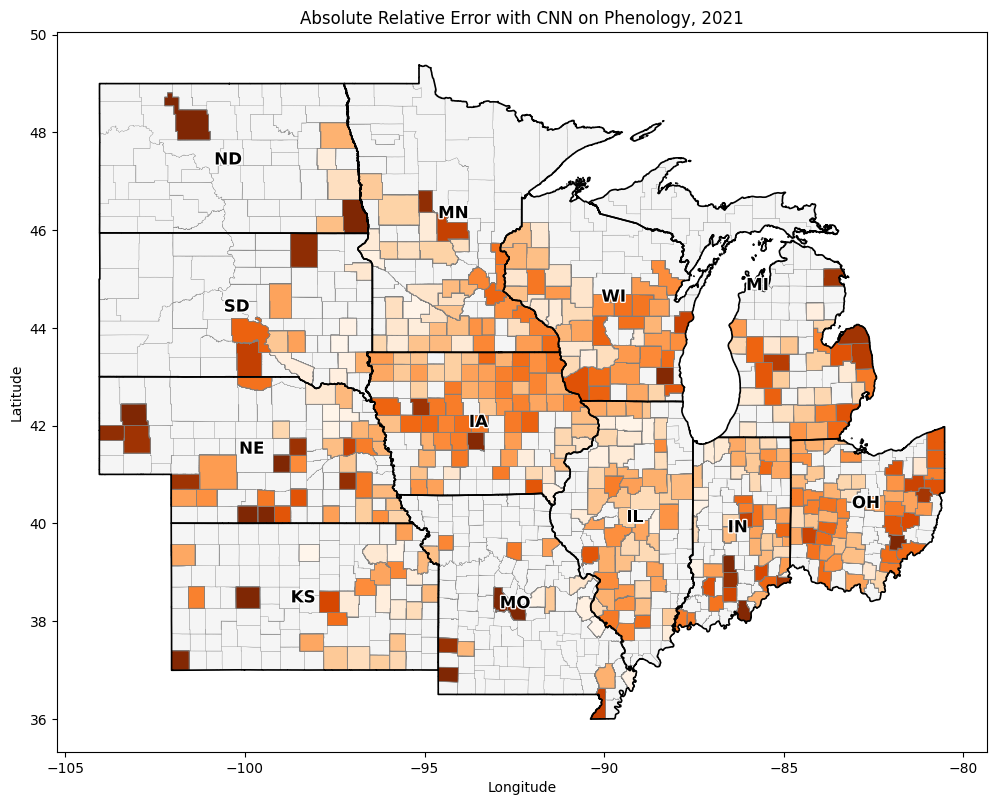

<ipython-input-22-6bf96394fa2b>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


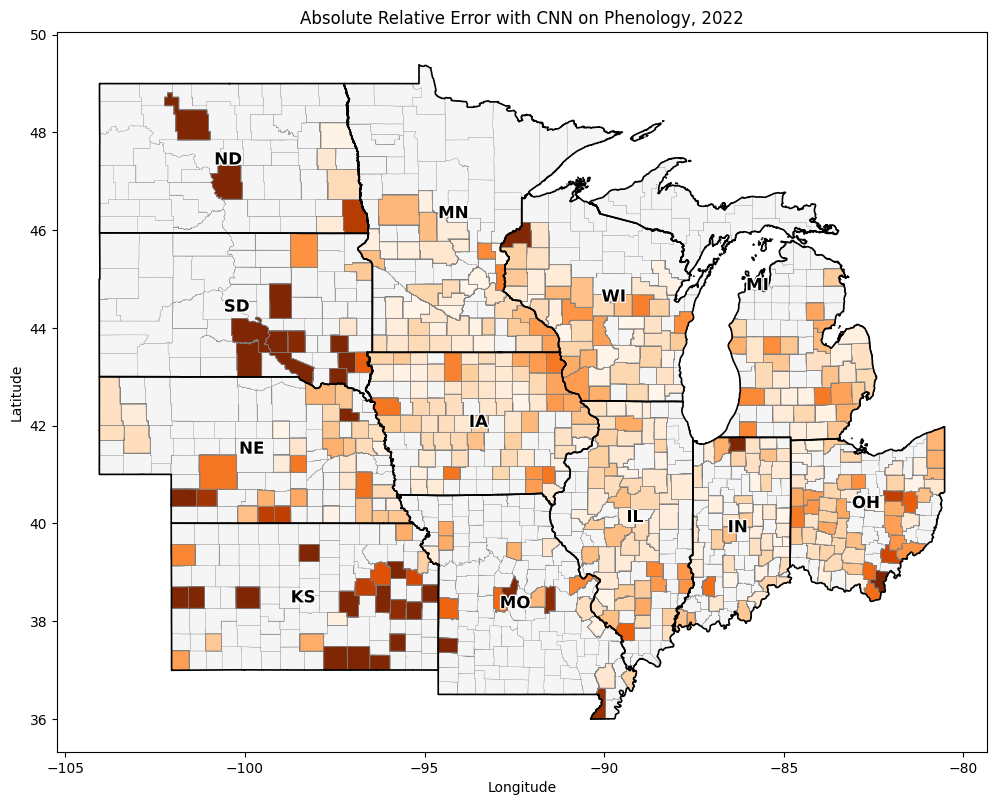

<ipython-input-22-6bf96394fa2b>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


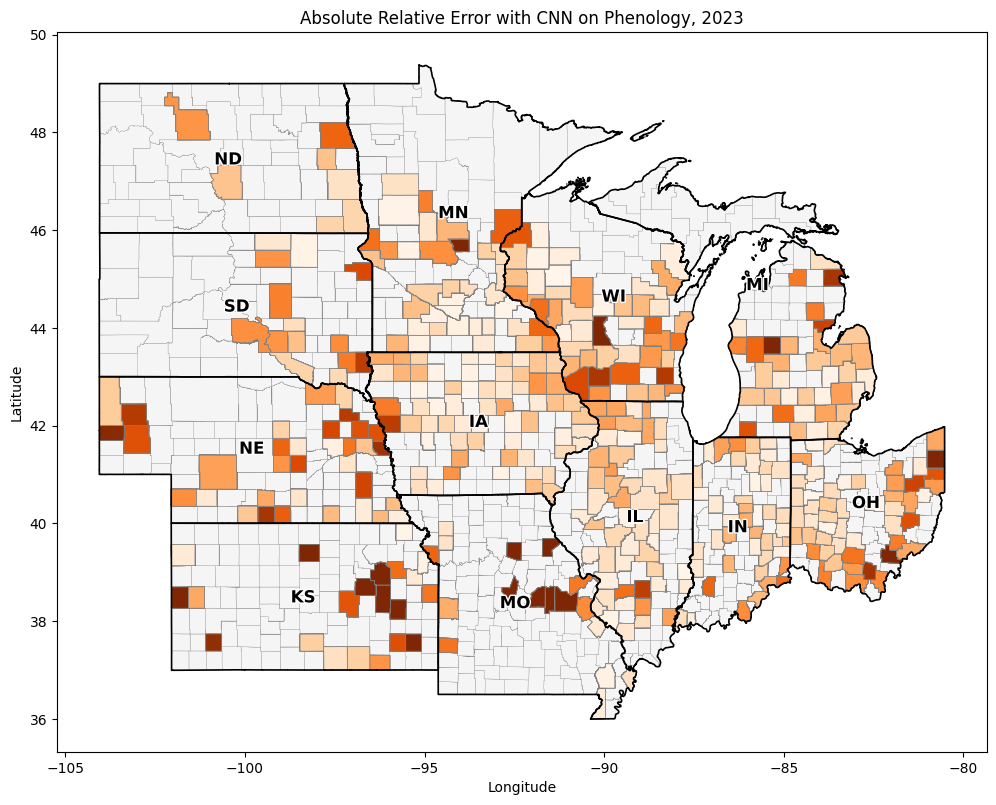

In [22]:
### Merge csv
pre = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/CNN_predictions_phe.csv')
# Assuming 'y_true' is the column with true values and 'y_pred' is the column with predicted values
pre['Absolute_Relative_Error'] = np.abs((pre['GroundTruth'] - pre['Predictions']) / pre['GroundTruth']) * 100
# pre - pre.sort_values(by='Predictions', ascending=False)
pre = pre.rename(columns={'Year': 'year', 'GroundTruth': 'Value'})
pre

pre['GEOID'] = pre['GEOID'].astype('int64')
geoid['GEOID'] = geoid['GEOID'].astype('int64')

### Megre gdf
# Merge using columns with different names
merged_df = pd.merge(pre, geoid, on=['year', 'GEOID', 'Value'], how='inner')
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()
merged_df
clipped_gdf_county['GEOID'] =  clipped_gdf_county['GEOID'].astype(str)
merged_df['GEOID'] = merged_df['GEOID'].astype(str)
merged_gdf =  clipped_gdf_county.merge(merged_df, on='GEOID', how='left')
merged_gdf = merged_gdf.dropna()
merged_gdf['year'] = merged_gdf['year'].astype(int)

### Plot
for year in range(2019, 2024):  # Loop through 2019 to 2023

    # Filter the merged GeoDataFrame for the current year
    merged_gdf_year = merged_gdf[merged_gdf['year'] == year]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))

    # 1. Plot county boundaries first (bottom layer)
    clipped_gdf_county.plot(
        ax=ax,
        facecolor='whitesmoke',
        edgecolor='grey',
        linewidth=0.2
    )

    # 2. Plot the data for the current year (middle layer)
    merged_gdf_year.plot(
        ax=ax,
        column='Absolute_Relative_Error',
        cmap='Oranges',
        # legend=True,
        edgecolor='grey',
        linewidth=0.5,
        vmin=0,
        vmax=20
    )

    # 3. Plot state boundaries last (top layer)
    clipped_gdf_state.plot(
        ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=1.2
    )

    # Add title and labels
    plt.title(f"Absolute Relative Error with CNN on Phenology, {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Add state labels
    for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):
        ax.text(x, y, label,
                fontsize=12,
                fontweight='bold',
                ha='center',
                va='center',
                color='black',
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])

    # Show the plot for the current year
    plt.show()

<ipython-input-24-48f63e728188>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


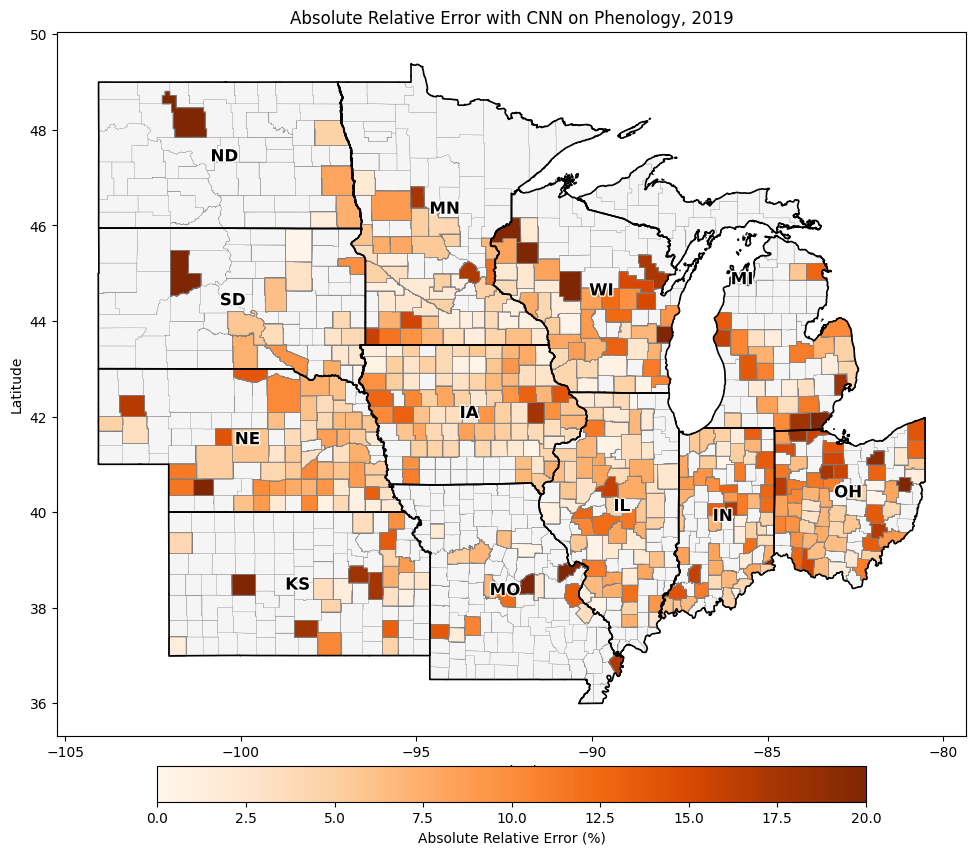

<ipython-input-24-48f63e728188>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


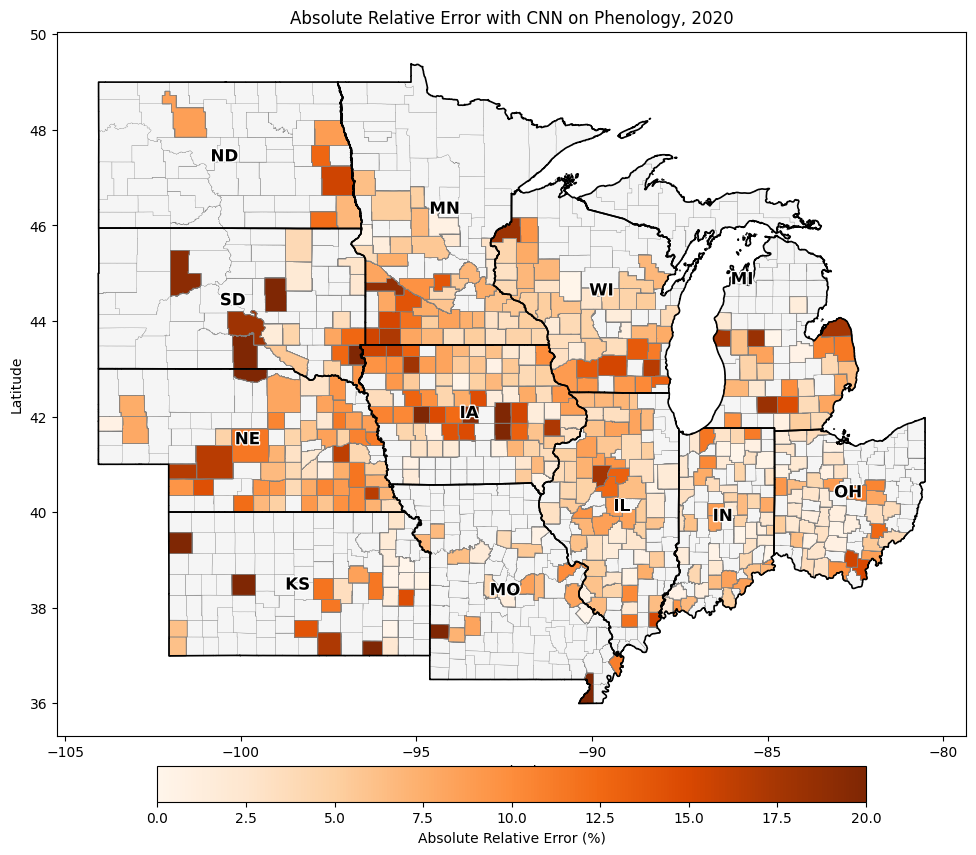

<ipython-input-24-48f63e728188>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


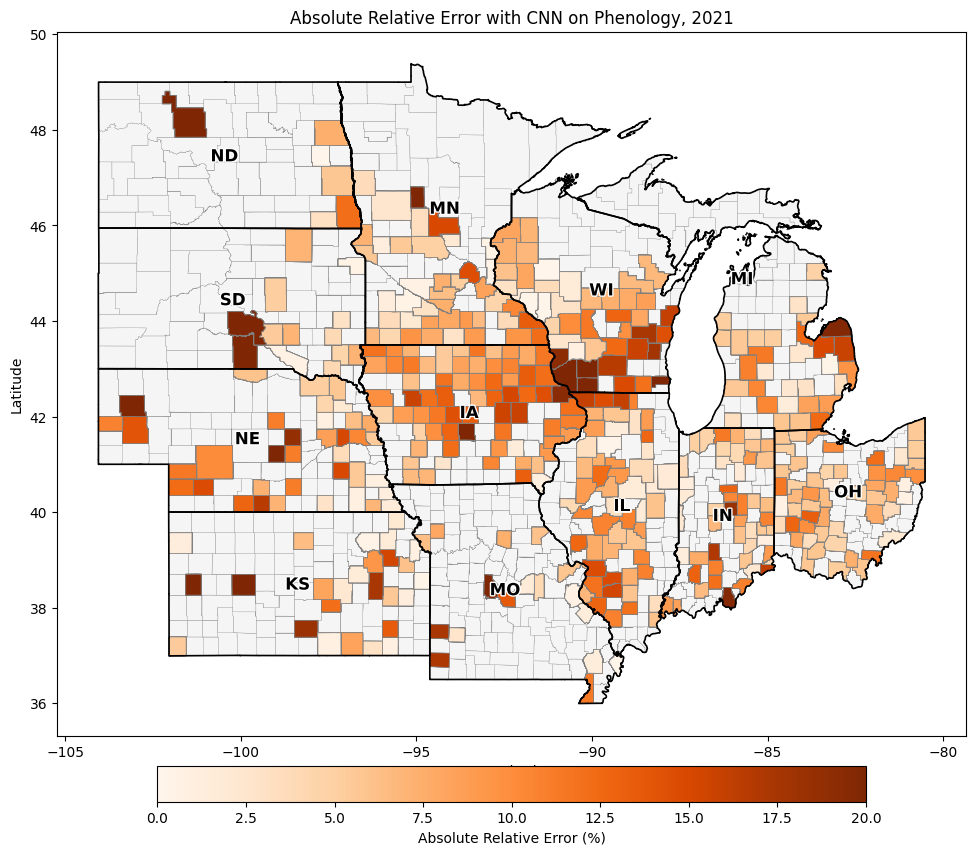

<ipython-input-24-48f63e728188>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


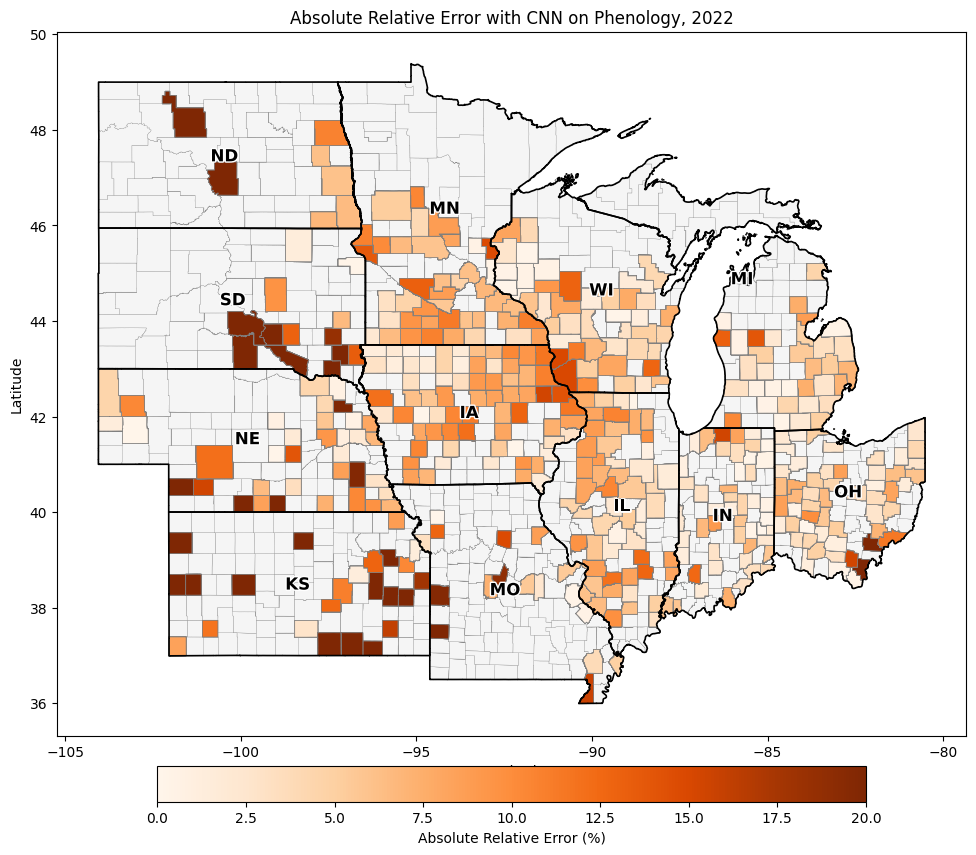

<ipython-input-24-48f63e728188>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


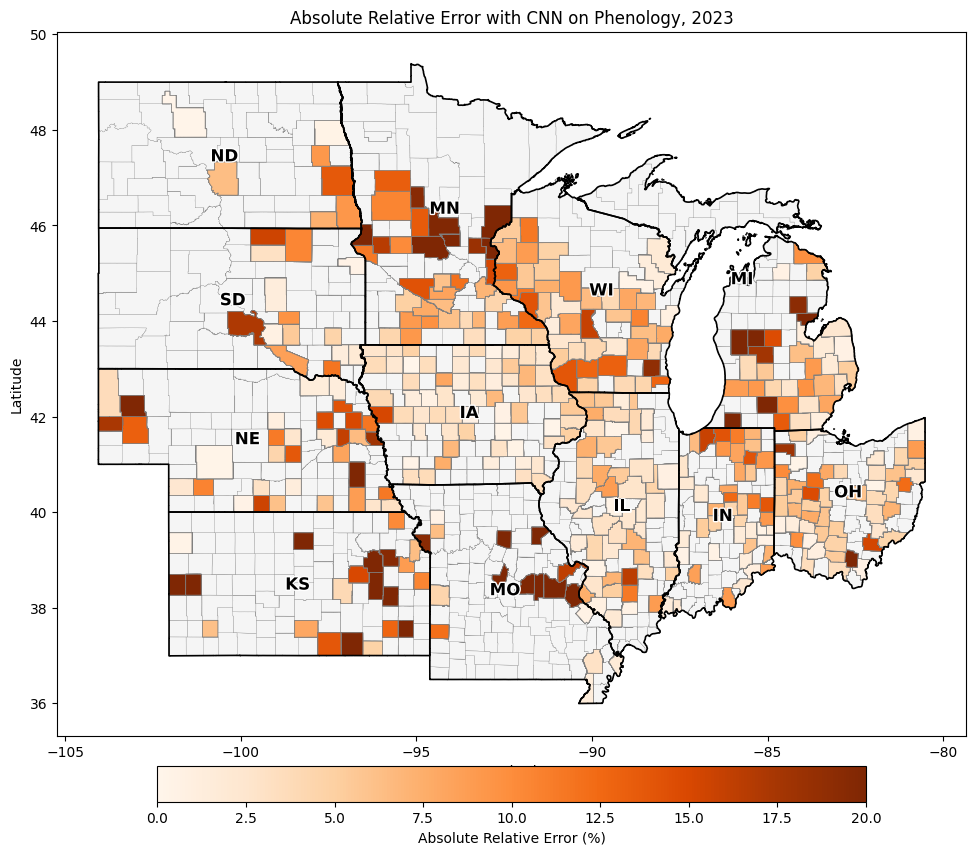

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patheffects as pe

for year in range(2019, 2024):  # Loop through 2019 to 2023

    merged_gdf_year = merged_gdf[merged_gdf['year'] == year]

    fig, ax = plt.subplots(figsize=(12, 10))

    # Plot county boundaries (bottom layer)
    clipped_gdf_county.plot(
        ax=ax,
        facecolor='whitesmoke',
        edgecolor='grey',
        linewidth=0.2
    )

    # Define normalization and colormap
    vmin, vmax = 0, 20
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.Oranges

    # Plot data (middle layer)
    merged_gdf_year.plot(
        ax=ax,
        column='Absolute_Relative_Error',
        cmap=cmap,
        norm=norm,
        edgecolor='grey',
        linewidth=0.5
    )

    # Plot state boundaries (top layer)
    clipped_gdf_state.plot(
        ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=1.2
    )

    # Title and labels
    plt.title(f"Absolute Relative Error with CNN on Phenology, {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # State labels
    for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):
        ax.text(x, y, label,
                fontsize=12,
                fontweight='bold',
                ha='center',
                va='center',
                color='black',
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])

    # Add horizontal color bar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
    cbar.set_label('Absolute Relative Error (%)')

    plt.show()


# 16 Days

<ipython-input-23-c52753e531d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoid['GEOID'] = geoid['GEOID'].astype('int64')
<ipython-input-23-c52753e531d7>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


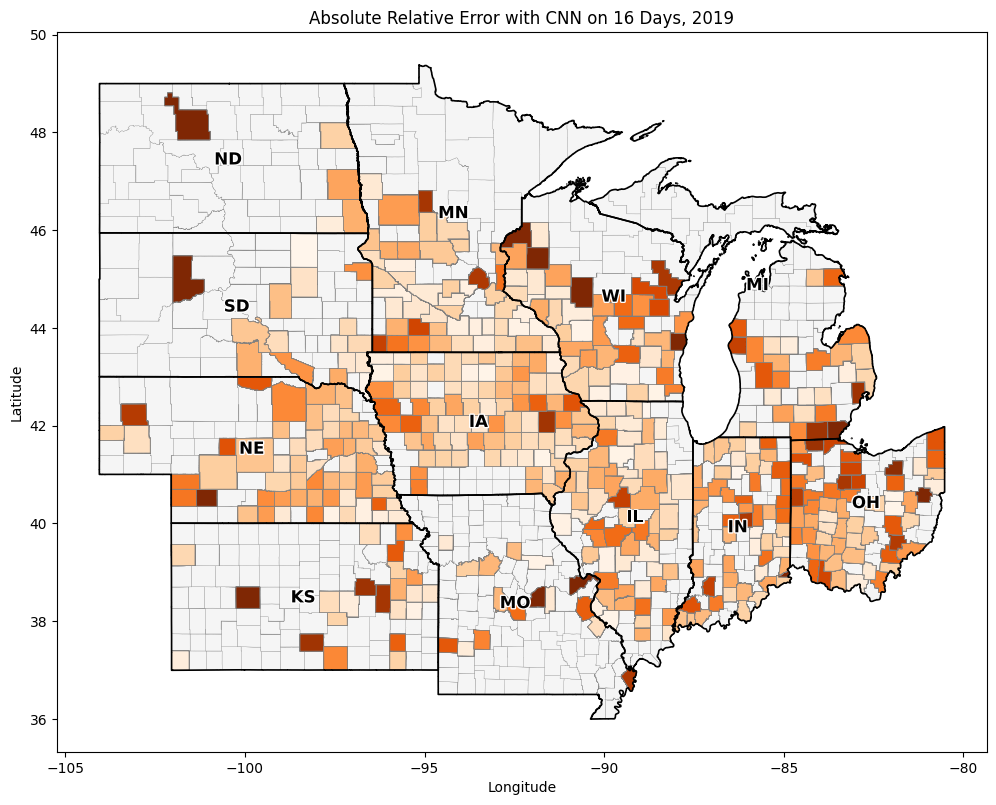

<ipython-input-23-c52753e531d7>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


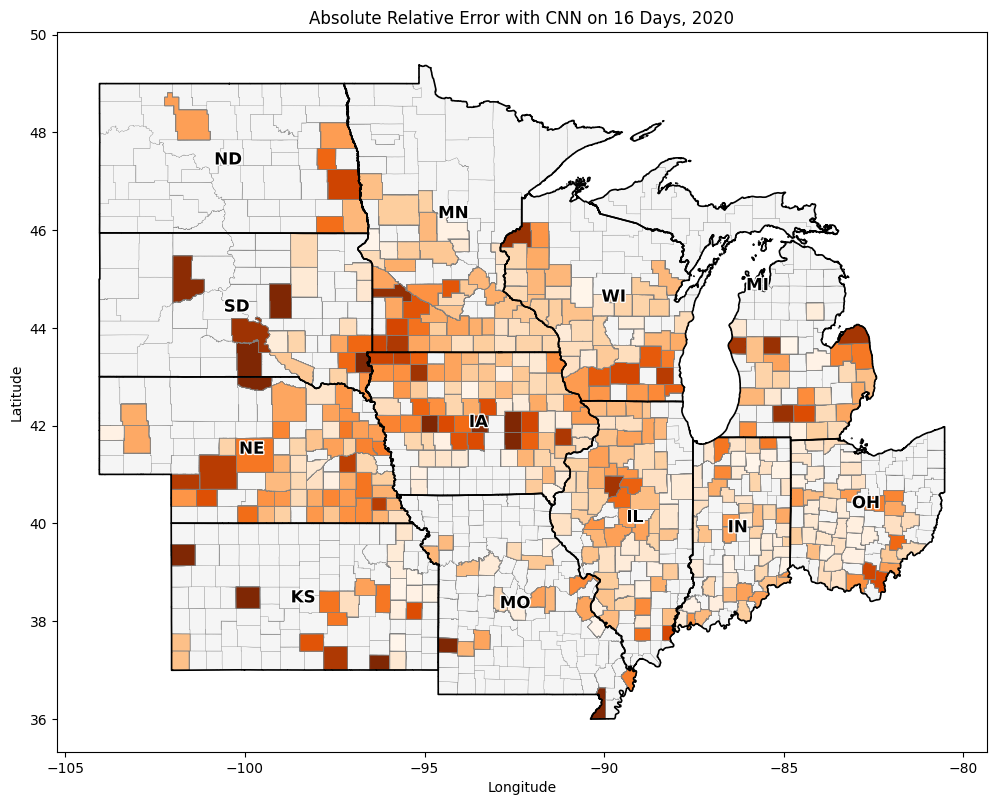

<ipython-input-23-c52753e531d7>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


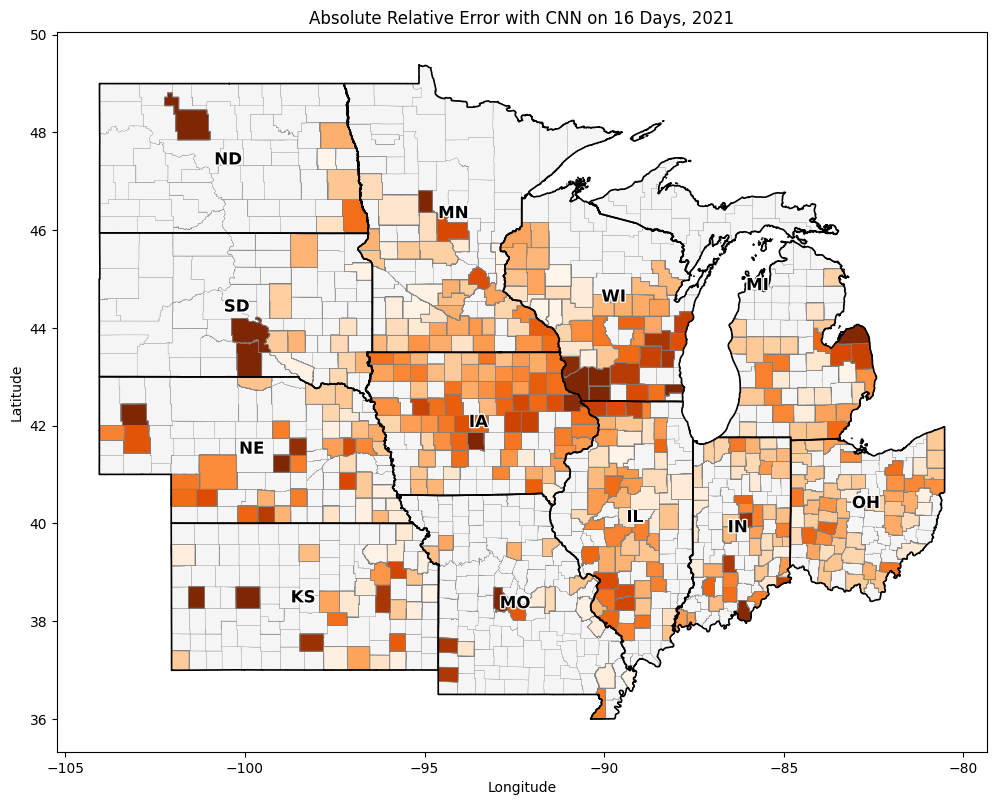

<ipython-input-23-c52753e531d7>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


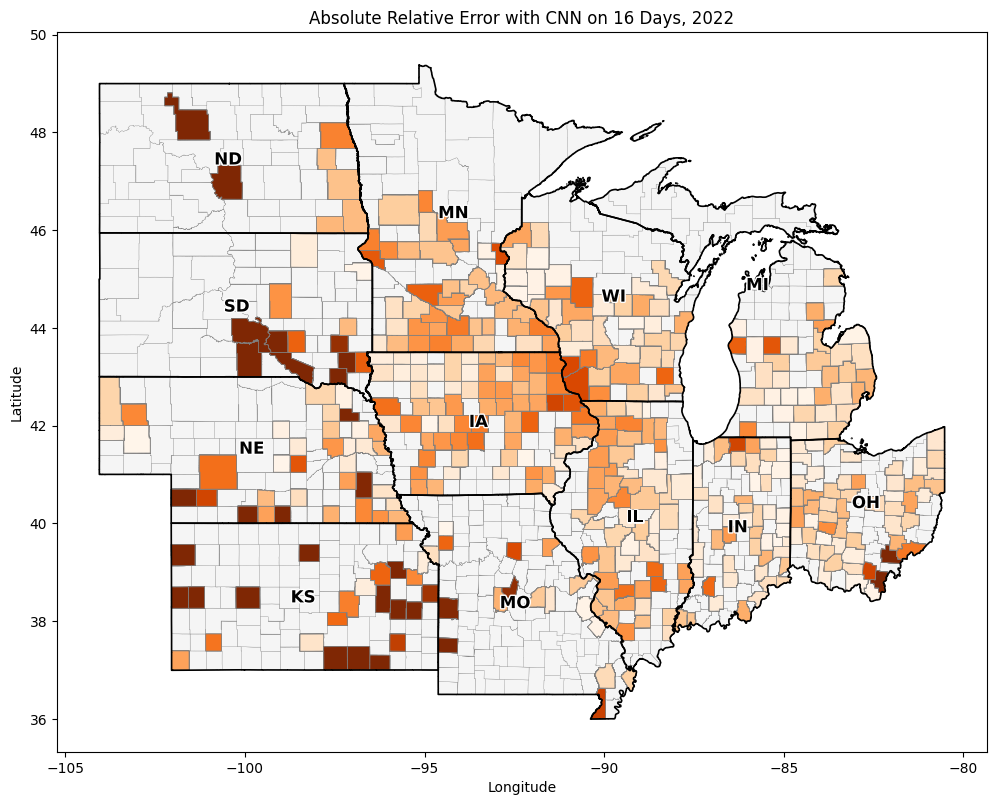

<ipython-input-23-c52753e531d7>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):


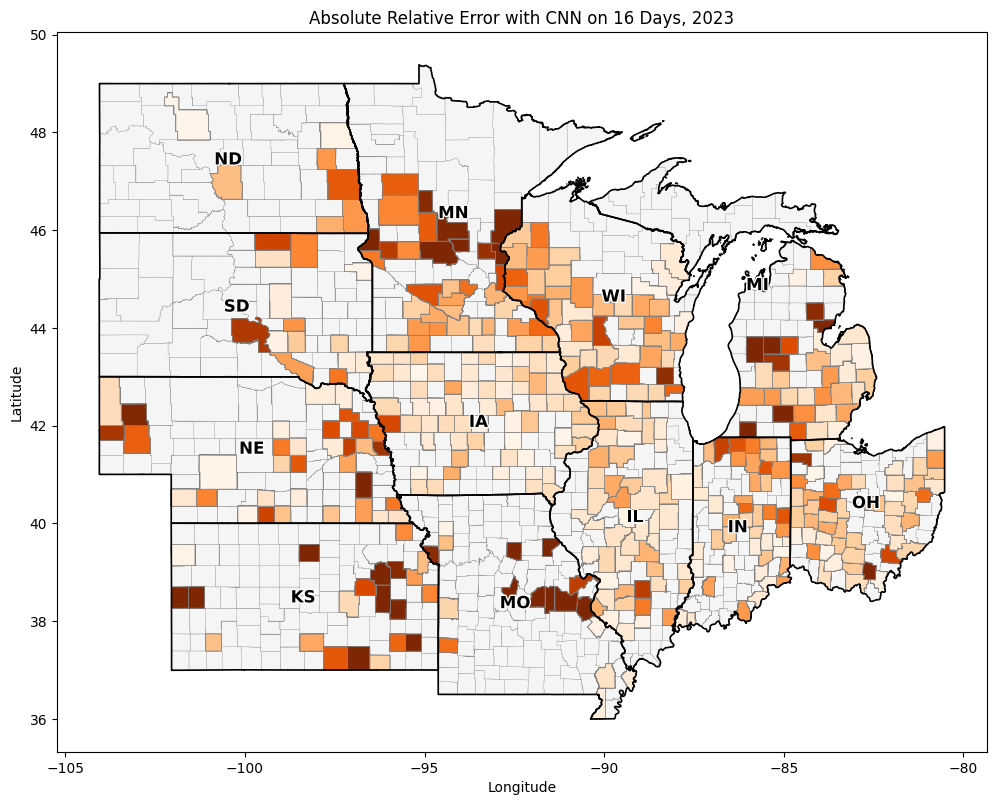

In [23]:
### Merge csv
pre = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/CNN_predictions_16.csv')
# Assuming 'y_true' is the column with true values and 'y_pred' is the column with predicted values
pre['Absolute_Relative_Error'] = np.abs((pre['GroundTruth'] - pre['Predictions']) / pre['GroundTruth']) * 100
# pre - pre.sort_values(by='Predictions', ascending=False)
pre = pre.rename(columns={'Year': 'year', 'GroundTruth': 'Value'})
pre

pre['GEOID'] = pre['GEOID'].astype('int64')
geoid['GEOID'] = geoid['GEOID'].astype('int64')

### Megre gdf
# Merge using columns with different names
merged_df = pd.merge(pre, geoid, on=['year', 'GEOID', 'Value'], how='inner')
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()
merged_df
clipped_gdf_county['GEOID'] =  clipped_gdf_county['GEOID'].astype(str)
merged_df['GEOID'] = merged_df['GEOID'].astype(str)
merged_gdf =  clipped_gdf_county.merge(merged_df, on='GEOID', how='left')
merged_gdf = merged_gdf.dropna()
merged_gdf['year'] = merged_gdf['year'].astype(int)

### Plot
for year in range(2019, 2024):  # Loop through 2019 to 2023

    # Filter the merged GeoDataFrame for the current year
    merged_gdf_year = merged_gdf[merged_gdf['year'] == year]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))

    # 1. Plot county boundaries first (bottom layer)
    clipped_gdf_county.plot(
        ax=ax,
        facecolor='whitesmoke',
        edgecolor='grey',
        linewidth=0.2
    )

    # 2. Plot the data for the current year (middle layer)
    merged_gdf_year.plot(
        ax=ax,
        column='Absolute_Relative_Error',
        cmap='Oranges',
        # legend=True,
        edgecolor='grey',
        linewidth=0.5,
        vmin=0,
        vmax=20
    )

    # 3. Plot state boundaries last (top layer)
    clipped_gdf_state.plot(
        ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=1.2
    )

    # Add title and labels
    plt.title(f"Absolute Relative Error with CNN on 16 Days, {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Add state labels
    for x, y, label in zip(gdf_state.geometry.centroid.x, gdf_state.geometry.centroid.y, gdf_state['STUSPS']):
        ax.text(x, y, label,
                fontsize=12,
                fontweight='bold',
                ha='center',
                va='center',
                color='black',
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])

    # Show the plot for the current year
    plt.show()